<a href="https://colab.research.google.com/github/Pinky-Chaudhary/Project_demo/blob/main/Pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
emotion_labels ={0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input,Reshape,Dense,Lambda,GlobalAveragePooling2D
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import plot_model


In [33]:
dataset_path = '/content/drive/MyDrive/fer2013/fer2013.csv'

def load_fer2013(dataset_path):
        data = pd.read_csv(dataset_path)
        pixels = data['pixels'].tolist()
        width, height = 48, 48
        faces = []
        for pixel_sequence in pixels:
            face = [int(pixel) for pixel in pixel_sequence.split(' ')]
            face = np.asarray(face).reshape(width, height)
            face = cv2.resize(face.astype('float32'),(100,100))
            face = cv2.cvtColor(face,cv2.COLOR_GRAY2RGB)
            faces.append(face)
        faces = np.asarray(faces)
        emotions = pd.get_dummies(data['emotion']).to_numpy()
        return faces, emotions
        
faces,emotions = load_fer2013(dataset_path)

In [38]:
def split_data(x, y):
    num_samples = len(x)
    num_train_samples = int(0.8*num_samples)
    train_x = x[:num_train_samples]
    train_y = y[:num_train_samples]
    val_x = x[num_train_samples:]
    val_y = y[num_train_samples:]
    train_data = (train_x, train_y)
    val_data = (val_x, val_y)
    return train_data, val_data
train_data, val_data = split_data(faces, emotions)

In [40]:
# Load data sets
(X_train, y_train), (X_test, y_test) = train_data,val_data
print(X_train.shape)
print(X_test.shape)

(28709, 100, 100, 3)
(7178, 100, 100, 3)


In [39]:
# Define Image Data Generator for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   shear_range=0.1,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

# Define Image Generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

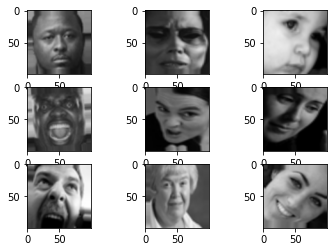

In [44]:
for X_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9, seed=42):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    # show the plot
    plt.show()
    break	

In [77]:
def mobile_net(height, width):
  
  # # Define Input layer
  input = Input(shape=(height, width,3))
  # Create MobileNets base model with pre-trained weights
  base_model = tf.keras.applications.MobileNetV2(input_shape = (height, width,3),alpha=1.0, include_top=False, weights='imagenet', input_tensor=input, pooling=None,classifier_activation='softmax'
)

  # Add a global average pooling layer
  x = GlobalAveragePooling2D()(base_model.output)
  
  # Add output layer
  output = Dense(7, activation='softmax')(x)

  model = Model(inputs=input, outputs=output)
  return model

In [80]:
# Instantiate a model
model = mobile_net(100, 100)

In [81]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-7, decay=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="mobile_net.h5",
                               verbose=0,
                               save_best_only=True)

history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32, seed=42), 
                    validation_data=test_datagen.flow(X_test, y_test, batch_size=32, seed=42),
                    callbacks=[checkpointer],
                    epochs = 20)

Epoch 1/20
898/898 [==============================] - 91s 97ms/step - loss: 1.6167 - accuracy: 0.3789 - val_loss: 2.0899 - val_accuracy: 0.4217
Epoch 2/20
898/898 [==============================] - 85s 95ms/step - loss: 1.1692 - accuracy: 0.5544 - val_loss: 1.5417 - val_accuracy: 0.5191
Epoch 3/20
898/898 [==============================] - 85s 95ms/step - loss: 1.0328 - accuracy: 0.6102 - val_loss: 1.1960 - val_accuracy: 0.5744
Epoch 4/20
898/898 [==============================] - 85s 94ms/step - loss: 0.9634 - accuracy: 0.6367 - val_loss: 1.1652 - val_accuracy: 0.5938
Epoch 5/20
898/898 [==============================] - 85s 95ms/step - loss: 0.8927 - accuracy: 0.6677 - val_loss: 1.1179 - val_accuracy: 0.6048
Epoch 6/20
898/898 [==============================] - 85s 95ms/step - loss: 0.8334 - accuracy: 0.6884 - val_loss: 1.0553 - val_accuracy: 0.6293
Epoch 7/20
898/898 [==============================] - 85s 95ms/step - loss: 0.7636 - accuracy: 0.7167 - val_loss: 1.0038 - val_accuracy:

In [82]:
def plot_learning_curves(history):
    plt.plot(history.history["accuracy"],label="Train Accuracy")
    plt.plot(history.history["val_accuracy"],label="Val Accuracy")
    plt.legend()
    plt.show()

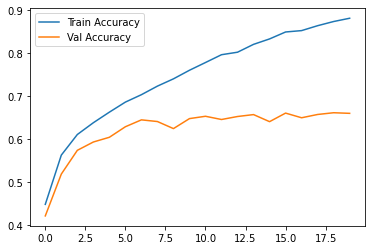

In [83]:
plot_learning_curves(history)
# completed in 28.4961

In [84]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import regularizers
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [85]:
# Getting ResNet50 and usng weights of imagenet dataset
base = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [86]:
model_resnet = models.Sequential()
model_resnet.add(base)
model_resnet.add(layers.Flatten())
model_resnet.add(layers.BatchNormalization())
model_resnet.add(layers.Dense(64, activation='relu'))
model_resnet.add(layers.Dropout(0.5))
model_resnet.add(layers.BatchNormalization())
model_resnet.add(layers.Dense(7, activation='softmax'))

In [89]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-7, decay=1e-5)
model_resnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="resnet.h5",
                               verbose=0,
                               save_best_only=True)
early_stop = EarlyStopping('val_loss', patience=5)

history_resnet = model_resnet.fit(train_datagen.flow(X_train, y_train, batch_size=32, seed=42), 
                    validation_data=test_datagen.flow(X_test, y_test, batch_size=32, seed=42),
                    callbacks=[checkpointer,early_stop],
                    epochs = 50)

Epoch 1/50
898/898 [==============================] - 122s 130ms/step - loss: 1.9751 - accuracy: 0.3296 - val_loss: 1.5437 - val_accuracy: 0.3984
Epoch 2/50
898/898 [==============================] - 117s 131ms/step - loss: 1.3488 - accuracy: 0.5124 - val_loss: 1.1363 - val_accuracy: 0.5719
Epoch 3/50
898/898 [==============================] - 117s 131ms/step - loss: 1.2269 - accuracy: 0.5586 - val_loss: 1.0749 - val_accuracy: 0.6041
Epoch 4/50
898/898 [==============================] - 118s 131ms/step - loss: 1.1114 - accuracy: 0.6040 - val_loss: 1.1013 - val_accuracy: 0.5943
Epoch 5/50
898/898 [==============================] - 118s 131ms/step - loss: 1.0521 - accuracy: 0.6220 - val_loss: 1.0698 - val_accuracy: 0.6063
Epoch 6/50
898/898 [==============================] - 117s 131ms/step - loss: 0.9978 - accuracy: 0.6411 - val_loss: 1.0582 - val_accuracy: 0.6131
Epoch 7/50
898/898 [==============================] - 118s 131ms/step - loss: 0.9905 - accuracy: 0.6495 - val_loss: 1.0018 -

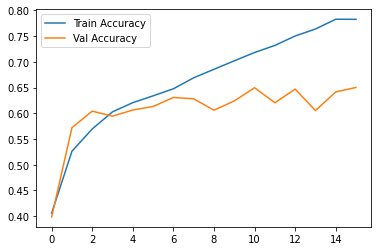

In [90]:
plot_learning_curves(history_resnet)
# completed in 31.50278 min